# Sommaire

 - <a href="#Q0">Mission n° 1, préparation des données.</a>
 - <a href="#Q1">Mission n° 2, graphiques.</a> 
 - <a href="#Q2">Mission n° 3, analyse.</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 80)
sns.set(font_scale=.8, style='whitegrid')

# round without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
# round with scientific notation, pd.set_option('display.precision', 2)

## <a name="Q0">Mission n° 1, préparation des données</a>

In [2]:
df = pd.read_csv('./data/livres.csv')
df_session = pd.read_csv('./data/session.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.to_datetime(df['month'])
df_session['min'] = pd.to_datetime(df_session['min'])
df_session['max'] = pd.to_datetime(df_session['max'])
df_session['date'] = pd.to_datetime(df_session['min'], format='%Y-%m').dt.to_period('M')

In [3]:
df_session.head()

,session_id,min,max,duration,panier,birth,age,date
0,s_1,2020-03-01 00:01:07.843138,2020-03-01 00:01:07.843138,0.00,11.99,1967,56,2020-03
1,s_10,2020-03-01 00:10:33.163037,2020-03-01 00:10:33.163037,0.00,26.99,1970,53,2020-03
2,s_100,2020-03-01 04:12:43.572994,2020-03-01 04:43:58.025677,1874.00,33.72,1978,45,2020-03
3,s_1000,2020-03-03 02:38:09.568389,2020-03-03 03:25:12.320225,2823.00,39.22,1989,34,2020-03
4,s_10000,2020-03-22 17:46:05.819130,2020-03-22 18:15:03.831240,1738.00,41.49,1989,34,2020-03


In [4]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157808 entries, 0 to 157807
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   session_id  157808 non-null  object        
 1   min         157808 non-null  datetime64[ns]
 2   max         157808 non-null  datetime64[ns]
 3   duration    157808 non-null  float64       
 4   panier      157808 non-null  float64       
 5   birth       157808 non-null  int64         
 6   age         157808 non-null  int64         
 7   date        157808 non-null  period[M]     
dtypes: datetime64[ns](2), float64(2), int64(2), object(1), period[M](1)
memory usage: 9.6+ MB


In [5]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,month
0,0_1483,2020-04-10 18:37:28.723910,s_18746,c_4450,f,1977,46,4.99,0,2020-04-01
1,2_226,2021-02-03 01:55:53.276402,s_159142,c_277,f,2000,23,65.75,2,2021-02-01
2,1_374,2020-09-23 15:13:46.938559,s_94290,c_4270,f,1979,44,10.71,1,2020-09-01
3,0_2186,2020-10-17 03:27:18.783634,s_105936,c_4597,m,1963,60,4.20,0,2020-10-01
4,0_1351,2020-07-17 20:34:25.800563,s_63642,c_1242,f,1980,43,8.99,0,2020-07-01


In [6]:
df.pivot_table(index=['client_id', 'session_id'], values='date', aggfunc='min')

date
client_id session_id                           
c_1       s_105105   2020-10-15 11:28:24.523566
          s_114737   2020-11-04 17:28:13.934070
          s_120172   2020-11-15 20:40:00.586010
          s_134971   2020-12-15 23:32:41.632729
          s_136532   2020-12-19 02:44:12.827475
...                                         ...
c_999     s_88239    2020-09-11 10:00:53.303706
          s_89648    2020-09-14 05:52:58.866737
          s_92374    2020-09-19 18:25:27.506135
          s_98289    2020-10-01 06:08:06.611034
          s_99070    2020-10-02 20:31:58.645109

[157808 rows x 1 columns]

In [7]:
df_rcc = df.groupby(['client_id', 'session_id'], as_index=False)[['date']].min().sort_values(by=['client_id', 'date'], ascending=[True, False])

In [8]:
liste_clients = df_rcc['client_id'].unique().tolist()
liste_clients[0:10]

['c_1',
 'c_10',
 'c_100',
 'c_1000',
 'c_1001',
 'c_1002',
 'c_1003',
 'c_1004',
 'c_1005',
 'c_1006']

In [9]:
df_grp = df_rcc.groupby('client_id')
df_grp

In [10]:
df_grp.get_group('c_1')['date'].diff(periods=-1).mean().days

16

In [11]:
for groupe in df_grp:
#groupe est un tuple
    if groupe[0] != 'c_1':
        break
    display(groupe[0]) #étiquette du groupe
    display(groupe[1])
#pass

'c_1'

,client_id,session_id,date
6,c_1,s_158128,2021-02-01 01:47:04.355850
5,c_1,s_139610,2020-12-25 03:53:43.623598
4,c_1,s_136532,2020-12-19 02:44:12.827475
3,c_1,s_134971,2020-12-15 23:32:41.632729
2,c_1,s_120172,2020-11-15 20:40:00.586010
1,c_1,s_114737,2020-11-04 17:28:13.934070
0,c_1,s_105105,2020-10-15 11:28:24.523566
14,c_1,s_86739,2020-09-08 08:27:49.586711
13,c_1,s_85977,2020-09-06 18:34:16.975976
12,c_1,s_79696,2020-08-23 16:56:15.401655


In [12]:
#frq_achat = [f for f in liste_clients]

In [13]:
frq_achat = list(map(lambda x: (df_grp.get_group(x)['date'].diff(periods=-1).mean().days)+1, liste_clients))

In [14]:
df_frq_achat = pd.DataFrame({'Clients': liste_clients, 'Fréquence d\'achat (jours)': frq_achat})
df_frq_achat[:5]

,Clients,Fréquence d'achat (jours)
0,c_1,17.00
1,c_10,18.00
2,c_100,57.00
3,c_1000,9.00
4,c_1001,16.00


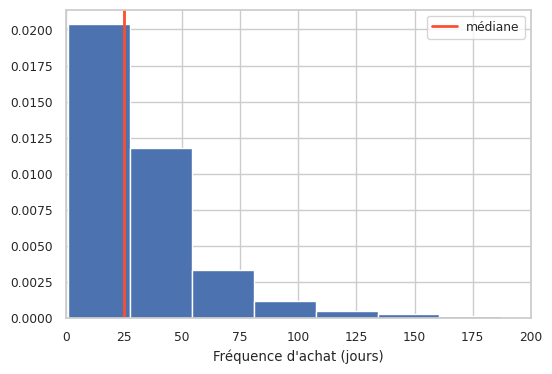

In [15]:
plt.figure(figsize=(6, 4))
nbc = np.int_(np.log2(len(df_frq_achat)+1))

df_frq_achat['Fréquence d\'achat (jours)'].hist(density=True, bins=nbc)

plt.xlabel('Fréquence d\'achat (jours)')

mediane = df_frq_achat['Fréquence d\'achat (jours)'].median()
color = '#fc4f30'
plt.axvline(mediane, color=color, label='médiane', linewidth=2)
plt.xlim(0, 200)

plt.legend()
plt.show()

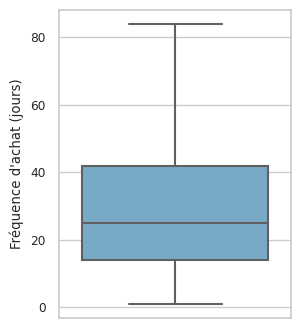

In [16]:
plt.figure(figsize=(3, 4))
sns.boxplot(y='Fréquence d\'achat (jours)', 
            showfliers=False, 
            data=df_frq_achat, palette='Blues');

In [17]:
df_frq_achat_grp = df_frq_achat.groupby('Fréquence d\'achat (jours)', as_index=False)[['Clients']].count()

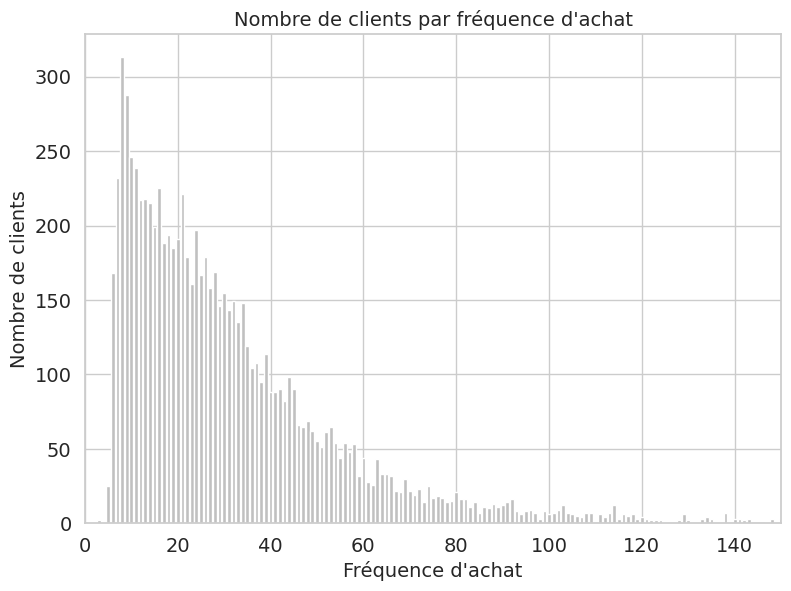

In [18]:
fig, ax = plt.subplots(layout='tight', figsize=(8, 6))
ax.bar(df_frq_achat_grp['Fréquence d\'achat (jours)'], df_frq_achat_grp['Clients'], color='Silver')
ax.set_title('Nombre de clients par fréquence d\'achat', fontsize=14)
ax.set_xlabel('Fréquence d\'achat', fontsize=14)
ax.set_ylabel('Nombre de clients', fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0, 150)
#ax.legend(prop={"size":16}, loc=(0, 0.95))
plt.show();

In [19]:
def categ_age(df):
    '''
    Création de catégories d'âge
    Args: df
    Returns: df
    '''
    df['age_categ'] = 0
    df.loc[(df['age'] < 20), 'age_categ'] = '-20'
    df.loc[(df['age'] >= 20) & (df['age'] <= 30), 'age_categ'] = '20-30'
    df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age_categ'] = '30-40'
    df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age_categ'] = '40-50'
    df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age_categ'] = '50-60'
    df.loc[(df['age'] > 60) & (df['age'] <= 70), 'age_categ'] = '60-70'
    df.loc[(df['age'] > 70) & (df['age'] <= 80), 'age_categ'] = '70-80'
    df.loc[(df['age'] > 80), 'age_categ'] = '80+'
    return df

In [20]:
categ_age(df)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,month,age_categ
0,0_1483,2020-04-10 18:37:28.723910,s_18746,c_4450,f,1977,46,4.99,0,2020-04-01,40-50
1,2_226,2021-02-03 01:55:53.276402,s_159142,c_277,f,2000,23,65.75,2,2021-02-01,20-30
2,1_374,2020-09-23 15:13:46.938559,s_94290,c_4270,f,1979,44,10.71,1,2020-09-01,40-50
3,0_2186,2020-10-17 03:27:18.783634,s_105936,c_4597,m,1963,60,4.20,0,2020-10-01,50-60
4,0_1351,2020-07-17 20:34:25.800563,s_63642,c_1242,f,1980,43,8.99,0,2020-07-01,40-50
...,...,...,...,...,...,...,...,...,...,...,...
313646,0_1475,2020-07-22 13:47:39.400914,s_65686,c_5607,m,1950,73,11.99,0,2020-07-01,70-80
313647,1_498,2021-02-03 01:39:15.793010,s_159138,c_1857,f,1990,33,23.37,1,2021-02-01,30-40
313648,0_759,2020-06-19 00:19:23.917703,s_50568,c_6268,m,1991,32,22.99,0,2020-06-01,30-40
313649,0_1256,2020-03-16 17:31:59.442007,s_7219,c_4137,f,1968,55,11.03,0,2020-03-01,50-60


In [21]:
df_session_client = df[['session_id', 'client_id']].copy()
df_session_client = df_session_client.drop_duplicates()

In [22]:
df_session_client = df_session.merge(df_session_client, on='session_id')
df_session_client[:5]

,session_id,min,max,duration,panier,birth,age,date,client_id
0,s_1,2020-03-01 00:01:07.843138,2020-03-01 00:01:07.843138,0.00,11.99,1967,56,2020-03,c_329
1,s_10,2020-03-01 00:10:33.163037,2020-03-01 00:10:33.163037,0.00,26.99,1970,53,2020-03,c_2218
2,s_100,2020-03-01 04:12:43.572994,2020-03-01 04:43:58.025677,1874.00,33.72,1978,45,2020-03,c_3854
3,s_1000,2020-03-03 02:38:09.568389,2020-03-03 03:25:12.320225,2823.00,39.22,1989,34,2020-03,c_1014
4,s_10000,2020-03-22 17:46:05.819130,2020-03-22 18:15:03.831240,1738.00,41.49,1989,34,2020-03,c_476


In [23]:
df_parcours = df_session.copy()

In [24]:
filt = (df_parcours['duration'] == 0)

In [25]:
df_parcours = df_parcours.loc[~filt,]

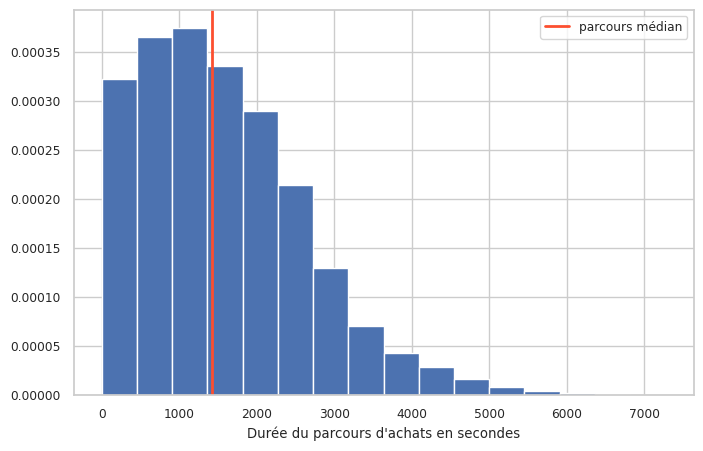

In [26]:
plt.figure(figsize=(8, 5))
nbc = np.int_(np.log2(len(df_parcours)+1))

df_parcours['duration'].hist(density=True, bins=nbc)

plt.xlabel('Durée du parcours d\'achats en secondes')

median_parcours = df_parcours['duration'].median()
color = '#fc4f30'
plt.axvline(median_parcours, color=color, label='parcours médian', linewidth=2)

plt.legend()
plt.show()

In [27]:
df_tx_clients = df['client_id'].value_counts().to_frame()

In [28]:
filt = (df_tx_clients['count'] == 1)
filt.value_counts()

count
False    8560
True       36
Name: count, dtype: int64

In [29]:
df_tx_clients = df_tx_clients.drop(index=df_tx_clients[filt].index)
df_tx_clients[:5]

,count
client_id,
c_2140,195
c_7959,195
c_8026,193
c_2595,193
c_3725,190


#### Repeat Customers = nombre de clients qui ont réalisé plus d’un achat pendant une période de temps donnée, de préférence une année pour obtenir des chiffres fiables.

In [30]:
repeat_customers = len(df_tx_clients)
repeat_customers

8560

#### Nombre de clients uniques = nombre de clients uniques qui ont réalisé des achats pendant la période de temps sélectionnée (c'est différent du nombre de commandes). 

In [31]:
unique_customers = df['client_id'].nunique()
print(f'nb de clients uniques : {unique_customers}')

nb de clients uniques : 8596


In [32]:
print('nb de clients uniques : %s'%(unique_customers))

nb de clients uniques : 8596


#### Taux de clients récurrents = taux d'achats répétés = nombre de clients ayant réalisé plus d’un achat / Nombre de clients uniques

In [33]:
tx_clients_recurrents = (repeat_customers/unique_customers)*100
print(f'Taux de clients récurrents : {np.round(tx_clients_recurrents, 2)} %')

Taux de clients récurrents : 99.58 %


#### Fréquence d’achat = nombre total de commandes / nombre de clients uniques = nombre de commandes par client

In [34]:
nb_commandes = df['session_id'].nunique()
frq_achat = nb_commandes / unique_customers
print('Nombre total de commandes :', nb_commandes, '\nFréquence d\'achat :', np.round(frq_achat, 2), '(nombre de commandes par client)')

Nombre total de commandes : 157808 
Fréquence d'achat : 18.36 (nombre de commandes par client)


#### Panier moyen = chiffre d’affaires généré / nombre total de commandes traitées

In [35]:
ca_annuel = df['price'].sum()
print(f'CA annuel : {int(ca_annuel)} EUR')

CA annuel : 5363661 EUR


In [36]:
panier_moyen = ca_annuel / nb_commandes
print(f'Panier moyen : {np.round(panier_moyen, 2)} EUR')

Panier moyen : 33.99 EUR


In [37]:
df_clients = df.copy()
df_clients.drop_duplicates(subset=['session_id'], keep='first', inplace=True, ignore_index=True)
df_clients

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,month,age_categ
0,0_1483,2020-04-10 18:37:28.723910,s_18746,c_4450,f,1977,46,4.99,0,2020-04-01,40-50
1,2_226,2021-02-03 01:55:53.276402,s_159142,c_277,f,2000,23,65.75,2,2021-02-01,20-30
2,1_374,2020-09-23 15:13:46.938559,s_94290,c_4270,f,1979,44,10.71,1,2020-09-01,40-50
3,0_2186,2020-10-17 03:27:18.783634,s_105936,c_4597,m,1963,60,4.20,0,2020-10-01,50-60
4,0_1351,2020-07-17 20:34:25.800563,s_63642,c_1242,f,1980,43,8.99,0,2020-07-01,40-50
...,...,...,...,...,...,...,...,...,...,...,...
157803,1_379,2020-11-13 07:55:16.437794,s_118934,c_1061,m,1991,32,26.99,1,2020-11-01,30-40
157804,0_153,2020-10-17 12:47:22.803642,s_106129,c_682,f,1974,49,3.99,0,2020-10-01,40-50
157805,1_282,2020-06-01 12:14:28.924898,s_42561,c_2945,f,1968,55,23.20,1,2020-06-01,50-60
157806,0_1256,2020-03-16 17:31:59.442007,s_7219,c_4137,f,1968,55,11.03,0,2020-03-01,50-60


#### Valeur client = fréquence d’achat * panier moyen

In [38]:
valeur_client = frq_achat * panier_moyen

In [39]:
dict_metrics = {'repeat_customers': str(repeat_customers), 'unique_customers': str(unique_customers),
                'repeat_buy (%)': tx_clients_recurrents, 'buy_frequency': frq_achat ,
                'panier_moyen (EUR)': panier_moyen, 'valeur_client (EUR)': valeur_client}

In [40]:
dict_metrics

{'repeat_customers': '8560',
 'unique_customers': '8596',
 'repeat_buy (%)': 99.58120055839925,
 'buy_frequency': 18.35830618892508,
 'panier_moyen (EUR)': 33.988530175909986,
 'valeur_client (EUR)': 623.9718438808752}

In [41]:
dict_metrics = {'Metric':['repeat_customers', 'unique_customers', 'repeat_buy (%)', 'buy_frequency', 'panier_moyen (EUR)', 'valeur_client (EUR)'],
                'Result':[str(repeat_customers), str(unique_customers), tx_clients_recurrents, frq_achat, panier_moyen, valeur_client]}

In [42]:
df_metrics = pd.DataFrame(dict_metrics)
df_metrics.set_index('Metric')

,Result
Metric,
repeat_customers,8560
unique_customers,8596
repeat_buy (%),99.58
buy_frequency,18.36
panier_moyen (EUR),33.99
valeur_client (EUR),623.97


## <a name="Q1">Mission n° 2, graphiques</a>

In [43]:
df_panier = df.copy()
df_panier.set_index('date', inplace=True)

In [44]:
df_panier = df_panier.resample('M').agg({'session_id':'nunique', 'price':'sum', 'id_prod':'count'})
df_panier['Panier_moyen'] = (df_panier['price'] / df_panier['session_id']).round(2)
df_panier.rename(columns = {'session_id': 'Nb sessions', 'price': 'Montant total', 'id_prod': 'Nombre de produits'}, inplace=True)
df_panier.index = df_panier.index.strftime('%Y-%m')
df_panier

,Nb sessions,Montant total,Nombre de produits,Panier_moyen
date,,,,
2020-03,13287,443029.02,26616,33.34
2020-04,13014,436319.16,26439,33.53
2020-05,13166,451391.86,26232,34.28
2020-06,12930,444927.41,25014,34.41
2020-07,12687,445696.37,23053,35.13
2020-08,12698,443261.59,23926,34.91
2020-09,13850,466870.24,30931,33.71
2020-10,10768,295308.48,20043,27.42
2020-11,13615,475212.38,26289,34.90


In [45]:
type(df_panier.index)

pandas.core.indexes.base.Index

In [46]:
type(df_panier['Nb sessions'])

pandas.core.series.Series

In [47]:
df_panier['Nombre de produits'].sum()

313651

In [48]:
df_panier['Panier_moyen'].mean()

33.88

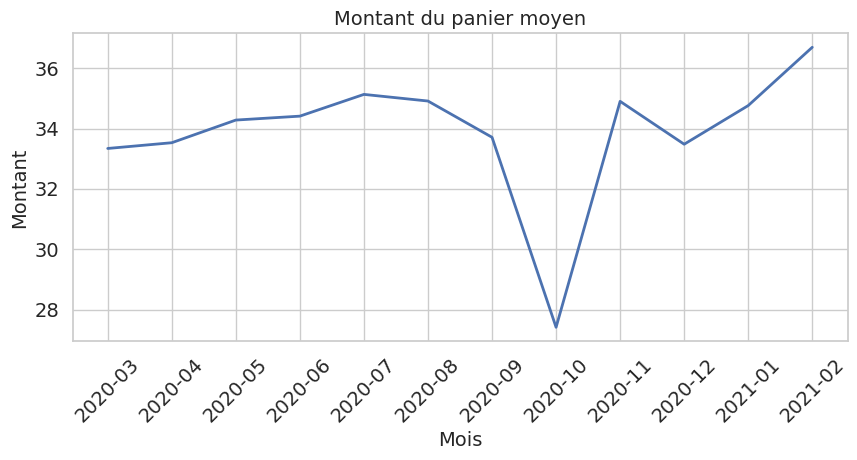

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_panier.index, df_panier['Panier_moyen'], label='Evolution du panier moyen', linewidth=2)
ax.set_title('Montant du panier moyen', fontsize=14)
ax.set_xlabel('Mois', fontsize=14)
ax.set_ylabel('Montant', fontsize=14)
ax.tick_params(axis='x', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', labelsize=14)
#ax.legend(prop={'size':16}, loc=(0, 0.95))
plt.savefig('./images/fig6.png', transparent=True)
plt.show()

In [50]:
df_session.sort_values(by='date', inplace=True)
df_session[:5]

,session_id,min,max,duration,panier,birth,age,date
0,s_1,2020-03-01 00:01:07.843138,2020-03-01 00:01:07.843138,0.00,11.99,1967,56,2020-03
9817,s_11208,2020-03-25 09:14:05.598849,2020-03-25 09:14:05.598849,0.00,14.42,1985,38,2020-03
82558,s_2714,2020-03-06 20:11:13.915036,2020-03-06 20:42:22.048288,1868.00,62.74,1960,63,2020-03
9827,s_11209,2020-03-25 09:16:36.548492,2020-03-25 09:28:38.697148,722.00,45.48,1973,50,2020-03
82548,s_2713,2020-03-06 20:10:11.681489,2020-03-06 20:16:15.501115,364.00,6.93,1981,42,2020-03


In [51]:
df_session['panier'].mean()

33.98853017590997

In [52]:
print('Montant du panier médian en euros :', df_session['panier'].median())

Montant du panier médian en euros : 25.31


In [53]:
df.set_index('date', inplace=True)
df.sort_values(by='date', inplace=True)
df[:5]

,id_prod,session_id,client_id,sex,birth,age,price,categ,month,age_categ
date,,,,,,,,,,
2020-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,56,11.99,0,2020-03-01,50-60
2020-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,63,19.37,0,2020-03-01,60-70
2020-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,35,4.50,0,2020-03-01,30-40
2020-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,34,6.55,0,2020-03-01,30-40
2020-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,67,16.49,0,2020-03-01,60-70


In [54]:
filt = (df['categ'] == 0)
df_0 = df[filt]

In [55]:
median_price = df_0['price'].median()
print('Prix d\'achat médian, categ 0 :', median_price)

Prix d'achat médian, categ 0 : 9.99


In [56]:
filt = (df['categ'] == 1)
df_1 = df[filt]

In [57]:
median_price = df_1['price'].median()
print('Prix d\'achat médian, categ 1 :', median_price)

Prix d'achat médian, categ 1 : 19.08


In [58]:
filt = (df['categ'] == 2)
df_2 = df[filt]

In [59]:
median_price = df_2['price'].median()
print('Prix d\'achat médian, categ 2 :', median_price)

Prix d'achat médian, categ 2 : 62.54


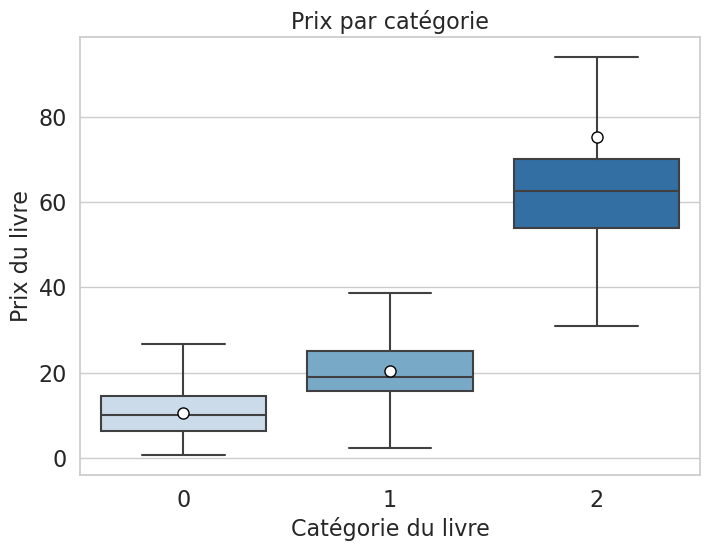

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y='price', 
            x='categ', 
            showfliers=False,
            orient='v', 
            palette='Blues',
            data=df,
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'},
            ax=ax)

ax.set_title('Prix par catégorie', fontsize=16)
ax.set_ylabel('Prix du livre', fontsize=16)
ax.set_xlabel('Catégorie du livre', fontsize=16)
ax.tick_params(axis='x', labelsize=16, labelrotation=0)
ax.tick_params(axis='y', labelsize=16)
plt.subplots_adjust(bottom = 0.15)
plt.show();

In [61]:
df_00 = df_0['price'].resample('M').sum().to_frame()
df_01 = df_1['price'].resample('M').sum().to_frame()
df_02 = df_2['price'].resample('M').sum().to_frame()
df_00.rename(columns = {'price': 'categ_0'}, inplace = True)
df_01.rename(columns = {'price': 'categ_1'}, inplace = True)
df_02.rename(columns = {'price': 'categ_2'}, inplace = True)
# display(df_00, df_01, df_02)

In [62]:
df_sub = df_00.merge(df_01, how='left', on='date')
df_sub = df_sub.merge(df_02, how='left', on='date')
df_sub.index = pd.to_datetime(df_sub.index)
df_sub.index = df_sub.index.strftime('%Y-%m')
df_sub[:5]

,categ_0,categ_1,categ_2
date,,,
2020-03,180668.06,174569.68,87791.28
2020-04,191505.28,145272.82,99541.06
2020-05,182358.67,155309.63,113723.56
2020-06,156636.82,177840.33,110450.26
2020-07,135457.36,176647.61,133591.40


In [63]:
#df_sub.plot(kind='bar', figsize=(12,8), stacked=True, title='CA par catégorie');

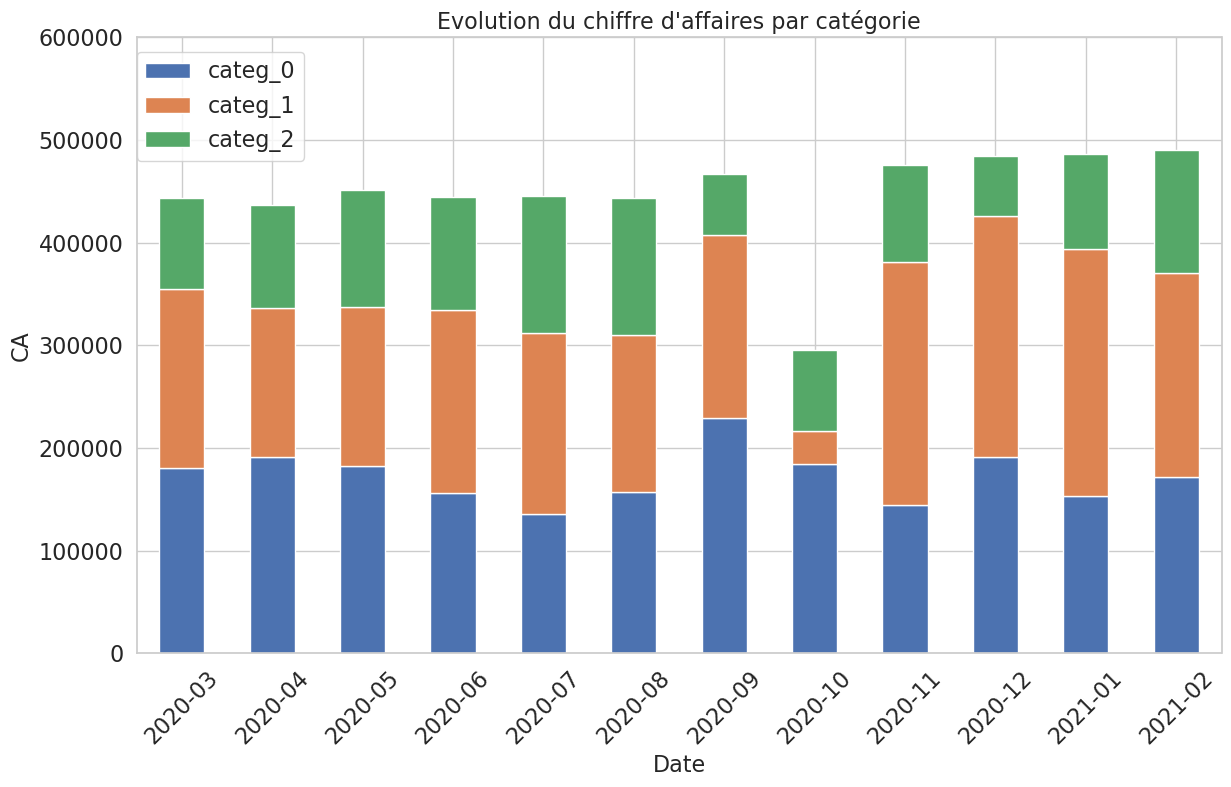

In [64]:
df_sub.plot(kind='bar', figsize=(14, 8), stacked=True, fontsize=16);
plt.title('Evolution du chiffre d\'affaires par catégorie', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel('CA', fontsize=16)
plt.ylim(0, 600000)
plt.legend(prop={'size':16}, loc=(0, 0.80))
plt.savefig('./images/fig11.png', transparent=True)

In [65]:
ca_month = df['price'].resample('M').sum().to_frame()
nb_ventes = df['id_prod'].resample('M').count().to_frame()
nb_visites = df['session_id'].resample('M').nunique().to_frame()

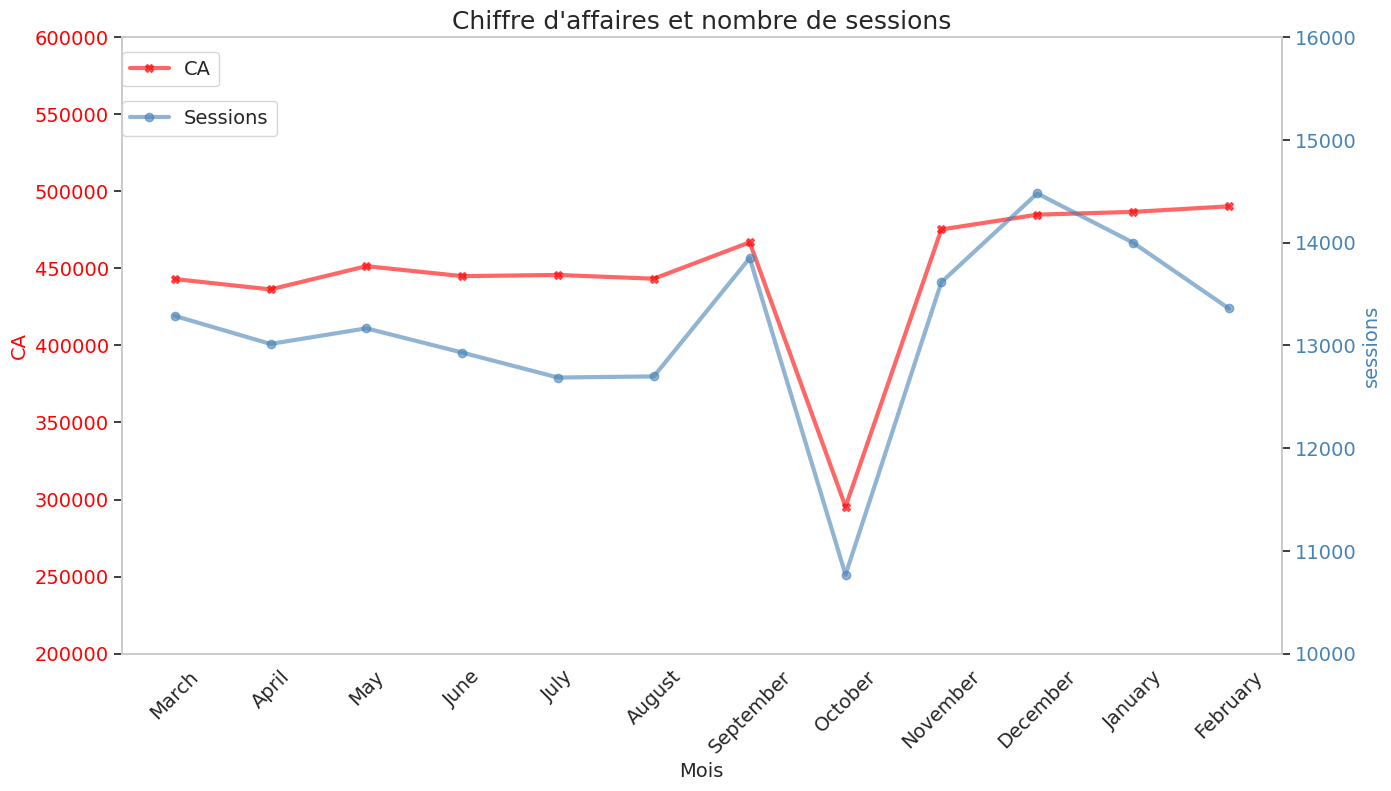

In [66]:
# colors 
col1 = 'red'
col2 = 'steelblue'
alpha = .6

# subplots
fig, ax = plt.subplots(figsize=(14, 8))

# ax
ax.plot(ca_month.index.month_name(), ca_month['price'], color=col1, marker='X', linewidth=3, alpha=alpha)

# titre
ax.set_title('Chiffre d\'affaires et nombre de sessions', fontsize=18)

# légende
ax.legend(['CA'], prop={'size':14}, loc=(0, 0.92))

# x-axis 
ax.set_xlabel('Mois', fontsize=14)
ax.tick_params(axis='x', labelrotation=45, labelsize=14)

# y-axis 
ax.set_ylabel('CA', color=col1, fontsize=14)
ax.tick_params(axis='y', labelcolor=col1, labelsize=14, labelrotation=0)
ax.set_ylim([200000, 600000])

# second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

# ax2
ax2.plot(nb_visites.index.month_name(), nb_visites['session_id'], color=col2, marker='o', linewidth=3, alpha=alpha)

# légende
ax2.legend(['Sessions'], prop={'size':14}, loc=(0, 0.84))

# second y-axis label
ax2.set_ylabel('sessions', color=col2, fontsize=14)
ax2.tick_params(axis='y', labelcolor=col2, labelsize=14)
ax2.set_ylim([10000, 16000])

ax.grid(False)
ax2.grid(False)

plt.tight_layout()
# plt.savefig('./images/fig7.png', transparent=True)
plt.show();

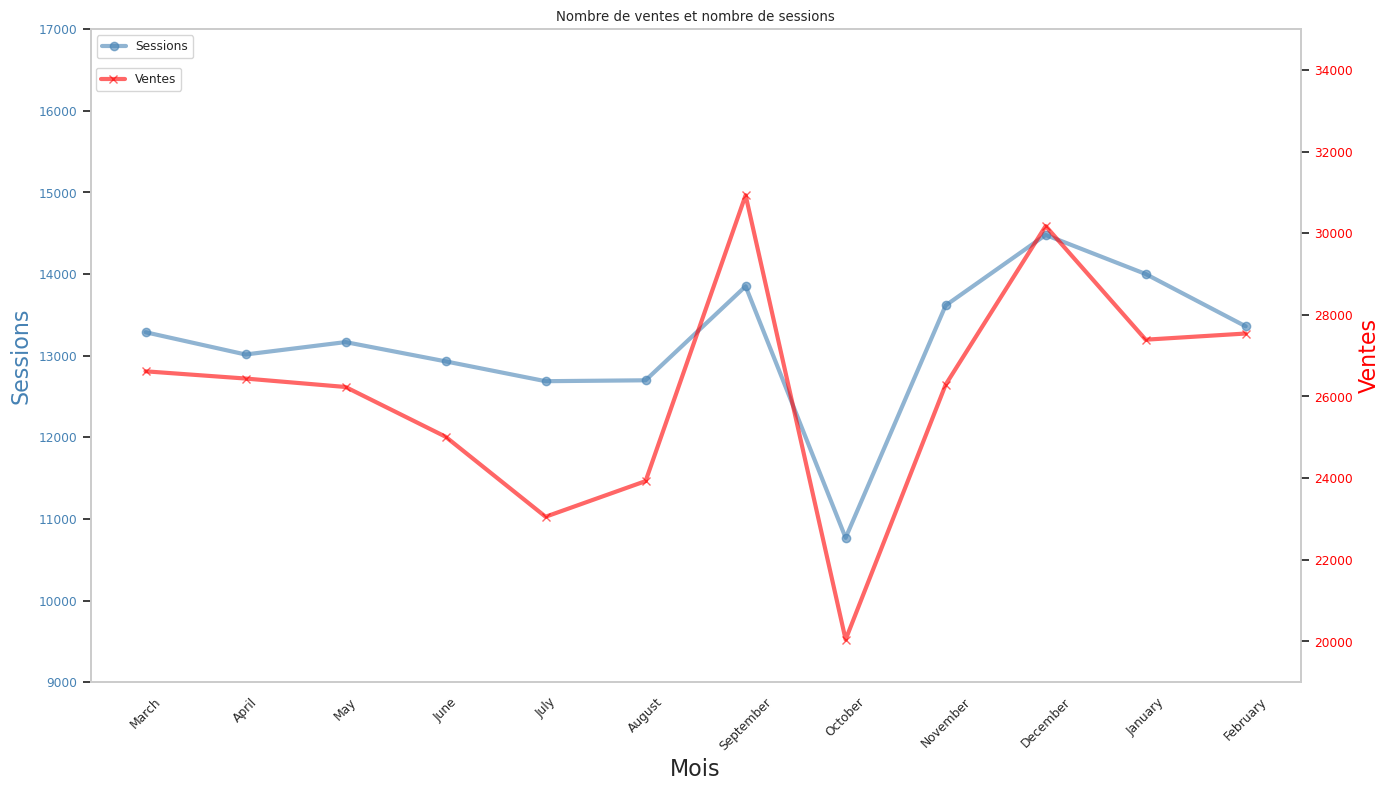

In [67]:
#
col1 = 'steelblue'
col2 = 'red'
alpha = .6

#
fig, ax = plt.subplots(figsize=(14, 8))

#
ax.plot(nb_visites.index.month_name(), nb_visites['session_id'], color=col1, marker='o', linewidth=3, alpha=alpha)

# 
ax.set_title('Nombre de ventes et nombre de sessions')

# 
ax.legend(['Sessions'], loc='upper left')

#
ax.set_xlabel('Mois', fontsize=16)

#
ax.set_ylabel('Sessions', color=col1, fontsize=16)
ax.tick_params(axis='y', labelcolor=col1)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim([9000, 17000])

#
ax2 = ax.twinx()

#
ax2.plot(nb_ventes.index.month_name(), nb_ventes['id_prod'], color=col2, marker='x', linewidth=3, alpha=alpha)

# 
ax2.legend(['Ventes'], bbox_to_anchor=(0.08, 0.95))

#
ax2.set_ylabel('Ventes', color=col2, fontsize=16)
ax2.tick_params(axis='y', labelcolor=col2)
ax2.set_ylim([19000, 35000])

ax.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show();

In [68]:
ca_categ = df.groupby('categ', as_index=False)[['price']].sum()

In [69]:
ca_categ

,categ,price
0,0,2078594.02
1,1,2101585.34
2,2,1183482.61


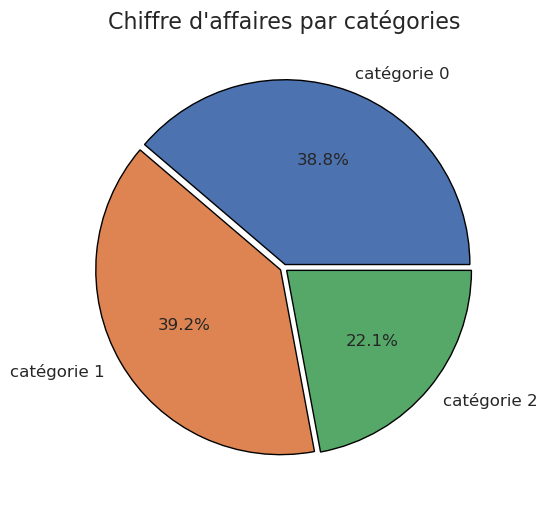

In [70]:
plt.figure(figsize=(10, 6))
slices = ca_categ['price']
labels = ['catégorie 0', 'catégorie 1', 'catégorie 2']
explode = [0.02, 0.02, 0.02]
textprops = {'fontsize':12}

plt.pie(slices, labels=labels, explode=explode, shadow=False,
        startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, textprops=textprops)

plt.title('Chiffre d\'affaires par catégories', fontsize=16)

# plt.savefig('./images/fig8.png', transparent=True)
plt.show()

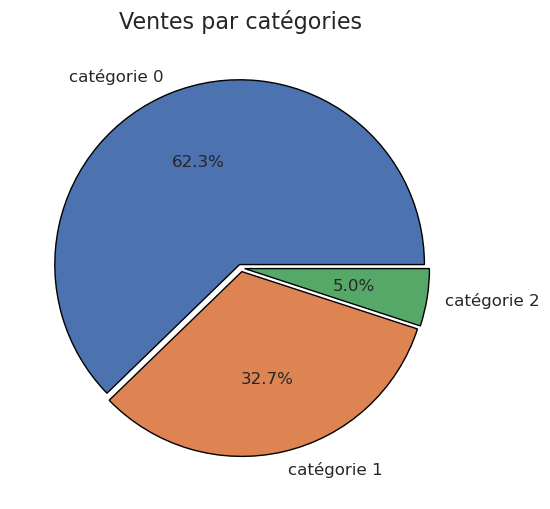

In [71]:
plt.figure(figsize=(10, 6))
slices = df['categ'].value_counts(normalize=True)
labels = ['catégorie 0', 'catégorie 1', 'catégorie 2']
explode = [0.02, 0.02, 0.02]
textprops = {'fontsize':12}

plt.pie(slices, labels=labels, explode=explode, shadow=False,
        startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, textprops=textprops)

plt.title('Ventes par catégories', fontsize=16)
plt.show()

***
***

In [72]:
# Nombre de ventes par produit
nb_prod = df.pivot_table(index='id_prod', values='session_id', aggfunc='count')
nb_prod.columns = ['nombre']

# CA par produit
ca_prod = df.pivot_table(index='id_prod', values='price', aggfunc='sum')
ca_prod.columns = ['ca']

# # Nombre de ventes par produit
# nb_prod = df.pivot_table(index='id_prod', values='session_id', aggfunc=len)
# nb_prod.columns = ['nombre']
# nb_prod

# # Nombre de ventes par produit
# nb_prod = df.pivot_table(index='id_prod', aggfunc='count')[['session_id']]
# nb_prod.columns = ['nombre']
# nb_prod

In [73]:
# prix par produit
filt = df['id_prod'].duplicated()
prix_prod = df.loc[~filt, ['id_prod', 'price']].set_index('id_prod')

In [74]:
ca_prix_nb = ca_prod.join(prix_prod).join(nb_prod)
ca_prix_nb.sort_values(by='ca', ascending=False)

,ca,price,nombre
id_prod,,,
2_135,30976.51,68.99,449
2_112,28649.68,67.57,424
2_102,26199.02,59.14,443
1_369,24349.85,23.99,1015
2_209,24286.53,69.99,347
...,...,...,...
0_1284,1.38,1.38,1
0_1840,1.28,1.28,1
0_1539,0.99,0.99,1


In [75]:
# Discrétisation de la variable 'prix' en 15 sous-groupes stockés dans la nouvelle variable 'categories_prix'
ca_prix_nb['categories_prix'] = pd.qcut(ca_prix_nb['price'], 15)

In [76]:
ca_prix_nb['categories_prix'].cat.categories

IntervalIndex([(0.619, 2.99], (2.99, 4.49], (4.49, 5.99], (5.99, 7.236], (7.236, 8.99] ... (18.99, 21.99], (21.99, 26.234], (26.234, 33.99], (33.99, 60.978], (60.978, 300.0]], dtype='interval[float64, right]')

In [77]:
ca_prix_nb[:5]

,ca,price,nombre,categories_prix
id_prod,,,,
0_0,2122.50,3.75,566,"(2.99, 4.49]"
0_1,2604.63,10.99,237,"(10.714, 12.13]"
0_10,197.45,17.95,11,"(16.298, 18.99]"
0_100,41.20,20.60,2,"(18.99, 21.99]"
0_1000,1402.20,6.84,205,"(5.99, 7.236]"


In [78]:
tableau_pivot = pd.pivot_table(ca_prix_nb, index='categories_prix', values=['ca', 'price'], aggfunc=np.median)
tableau_pivot[:5]

,ca,price
categories_prix,,
"(0.619, 2.99]",6.78,2.14
"(2.99, 4.49]",143.64,3.99
"(4.49, 5.99]",224.62,5.05
"(5.99, 7.236]",202.71,6.99
"(7.236, 8.99]",313.02,8.12


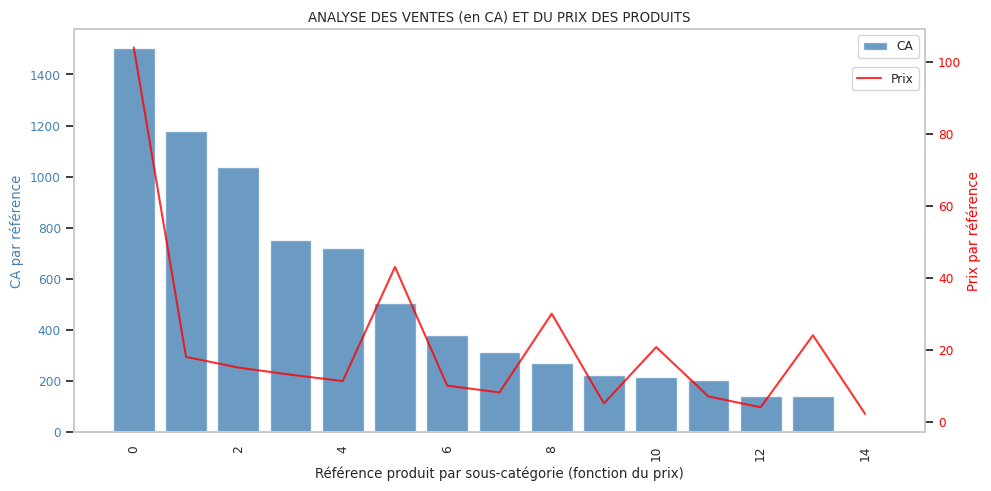

In [79]:
tableau_pivot = tableau_pivot.sort_values(by='ca', ascending=False).reset_index()

#
col1 = 'steelblue'
col2 = 'red'
alpha = .8

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.bar(tableau_pivot['ca'].index, tableau_pivot['ca'], color=col1, alpha=alpha)
ax2.plot(tableau_pivot['ca'].index, tableau_pivot['price'], color=col2, alpha=alpha)

#ax1.set_xticklabels(ca_prix_h.index, rotation='vertical', size=8)
ax1.tick_params(axis='x', labelrotation=90)
ax1.tick_params(axis='y', labelcolor=col1)
ax1.set_xlabel('Référence produit par sous-catégorie (fonction du prix)')
ax1.set_ylabel('CA par référence', color=col1)
ax1.legend(['CA'], loc='upper right')
ax2.set_ylabel('Prix par référence', color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
ax2.legend(['Prix'], bbox_to_anchor=(1, 0.92))

ax1.grid(False)
ax2.grid(False)

plt.title('ANALYSE DES VENTES (en CA) ET DU PRIX DES PRODUITS')
plt.tight_layout()
plt.show();

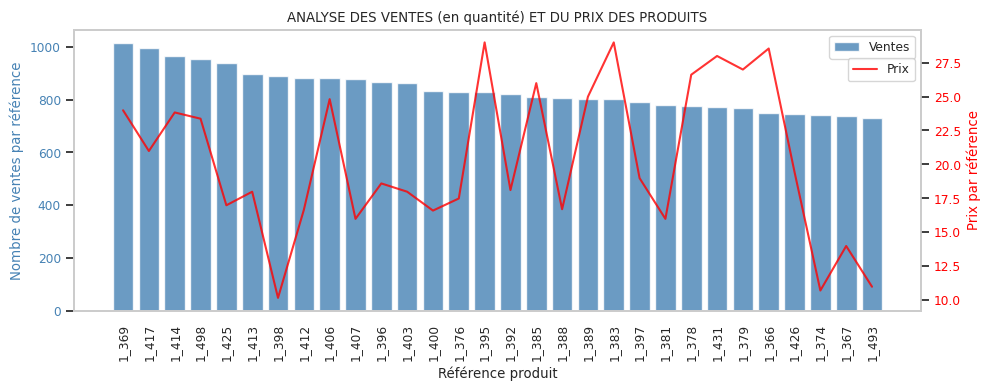

In [80]:
ca_prix_nb = ca_prix_nb.sort_values(by='nombre', ascending=False)

#
col1 = 'steelblue'
col2 = 'red'
alpha = .8

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ca_prix_nb_h = ca_prix_nb.head(30)

ax1.bar(ca_prix_nb_h.index, ca_prix_nb_h['nombre'], color=col1, alpha=alpha)
ax2.plot(ca_prix_nb_h.index, ca_prix_nb_h['price'], color=col2, alpha=alpha)

#ax1.set_xticklabels(ca_prix_h.index, rotation='vertical', size=8)
ax1.tick_params(axis='x', labelrotation=90)
ax1.tick_params(axis='y', labelcolor=col1)
ax1.set_xlabel('Référence produit')
ax1.set_ylabel('Nombre de ventes par référence', color=col1)
ax1.legend(['Ventes'], loc='upper right')
ax2.set_ylabel('Prix par référence', color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
ax2.legend(['Prix'], bbox_to_anchor=(1, 0.92))

ax1.grid(False)
ax2.grid(False)

plt.title('ANALYSE DES VENTES (en quantité) ET DU PRIX DES PRODUITS')
plt.tight_layout()
plt.show();

In [81]:
test = df.groupby('age', as_index=False)[['id_prod']].count().sort_values(by='age')
test.head()

,age,id_prod
0,19,7348
1,20,2182
2,21,2224
3,22,2032
4,23,2175


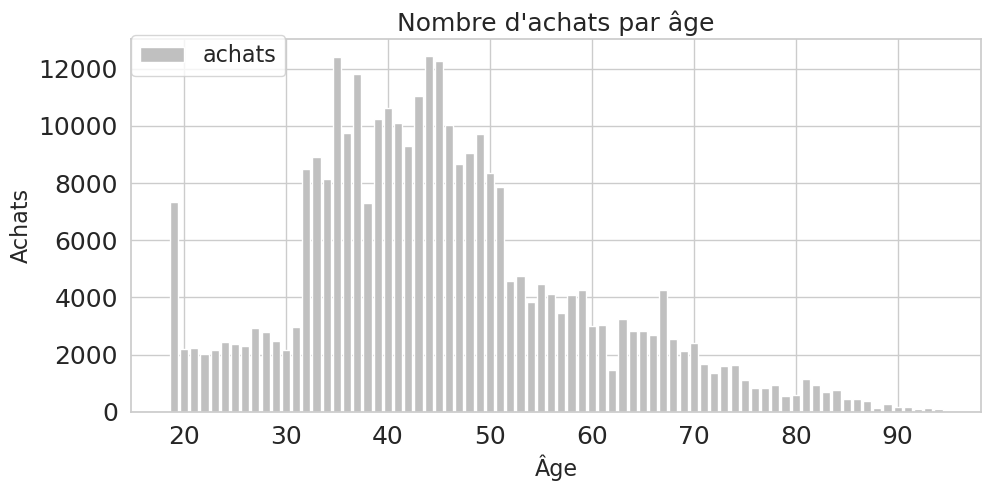

In [82]:
fig, ax = plt.subplots(layout='tight', figsize=(10, 5))
ax.bar(test['age'], test['id_prod'], label='achats', color='Silver')
ax.set_title('Nombre d\'achats par âge', fontsize=18)
ax.set_xlabel('Âge', fontsize=16)
ax.set_ylabel('Achats', fontsize=16)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(prop={"size":16}, loc=(0, 0.90))
plt.savefig('./images/fig9.png', transparent=True)
plt.show()

In [83]:
test = df.groupby('age_categ', as_index=False)[['price']].sum().sort_values(by='age_categ')
test.head()

,age_categ,price
0,-20,295387.98
1,20-30,1042814.69
2,30-40,1261048.50
3,40-50,1320384.81
4,50-60,708538.73


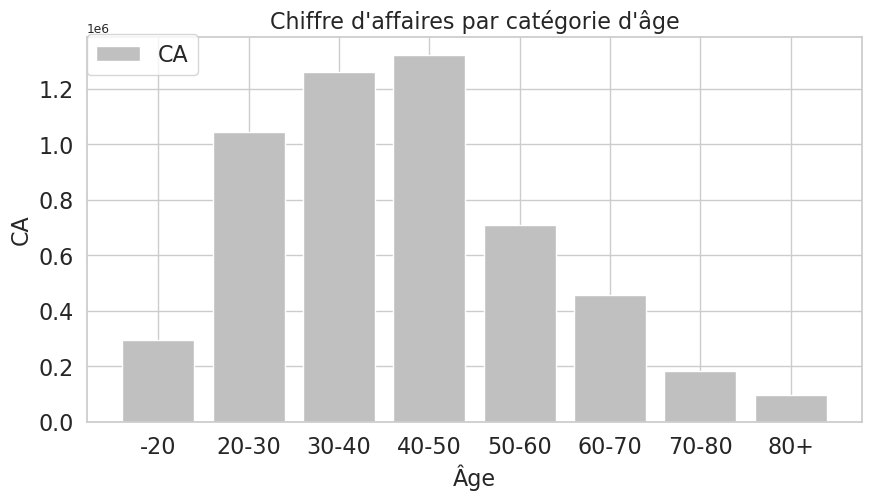

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(test['age_categ'], test['price'], label='CA', color='Silver')
ax.set_title('Chiffre d\'affaires par catégorie d\'âge', fontsize=16)
ax.set_xlabel('Âge', fontsize=16)
ax.set_ylabel('CA', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(prop={'size':16}, loc=(0, 0.90))
# plt.savefig('./images/fig10.png', transparent=True)
plt.show();

---

## <a name="Q2">Mission n° 3, analyse</a>

### Montant total des achats en fonction de l'âge des clients

In [85]:
# Montant des achats par âge
df_achat_age = df.pivot_table(index='age', values='price', aggfunc='sum')
# df_achat_age = df.groupby('age', as_index=False)[['price']].sum()

In [86]:
# remove outlier

df_achat_age = df_achat_age.loc[20:, :]
df_achat_age[:5]

,price
age,
20,88461.39
21,89920.01
22,84881.48
23,80109.91
24,96515.12


In [87]:
df_achat_age = df_achat_age.reset_index()

In [88]:
def categorise(row):
    if row['age'] <= 45:
        return '18-45'
    else:
        return '45+'

In [89]:
df_achat_age['categ'] = df_achat_age.apply(categorise, axis=1)
df_achat_age.head()

,age,price,categ
0,20,88461.39,18-45
1,21,89920.01,18-45
2,22,84881.48,18-45
3,23,80109.91,18-45
4,24,96515.12,18-45


In [90]:
df_achat_age['color'] = df_achat_age['categ'].map({'18-45':'red', '45+':'blue'})

In [91]:
df_achat_age.head()

,age,price,categ,color
0,20,88461.39,18-45,red
1,21,89920.01,18-45,red
2,22,84881.48,18-45,red
3,23,80109.91,18-45,red
4,24,96515.12,18-45,red


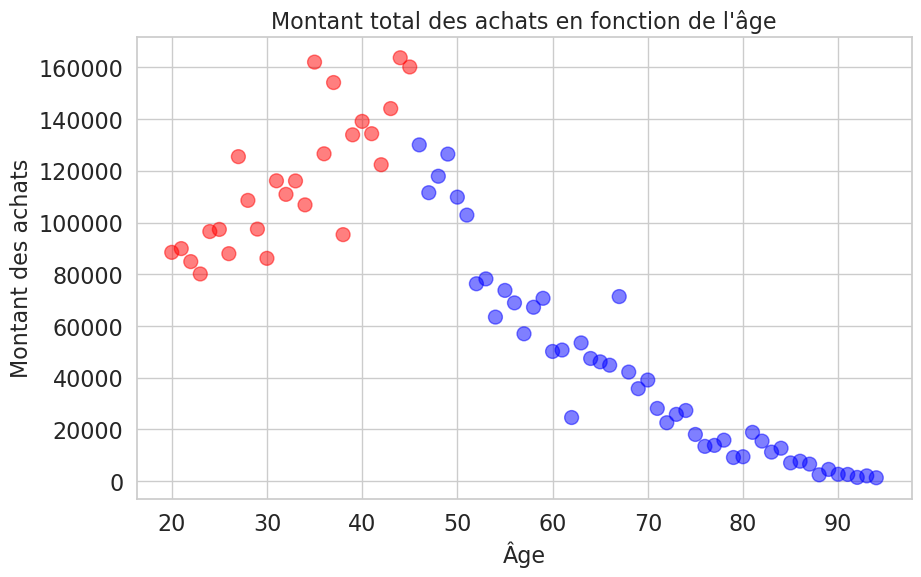

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_achat_age['age'], df_achat_age['price'], alpha=.5, s=100, c=df_achat_age['color'], cmap=None)
ax.set_title('Montant total des achats en fonction de l\'âge', fontsize=16)
ax.set_xlabel('Âge', fontsize=16)
ax.set_ylabel('Montant des achats', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show();

In [93]:
filt=(df_achat_age['categ']=='18-45')

In [94]:
reg1 = smf.ols('price ~ age', data=df_achat_age.loc[filt, :]).fit()
reg2 = smf.ols('price ~ age', data=df_achat_age.loc[~filt, :]).fit()

In [95]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     44.22
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           7.05e-07
Time:                        12:10:19   Log-Likelihood:                -287.23
No. Observations:                  26   AIC:                             578.5
Df Residuals:                      24   BIC:                             581.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.713e+04   1.38e+04      1.967      0.0

In [96]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     296.7
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           6.15e-22
Time:                        12:10:19   Log-Likelihood:                -535.58
No. Observations:                  49   AIC:                             1075.
Df Residuals:                      47   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.097e+05   9952.062     21.066      0.0

In [97]:
reg1.params

Intercept   27127.54
age          2749.35
dtype: float64

In [98]:
a1 = reg1.params['age']
a2 = reg2.params['age']

b1 = reg1.params['Intercept']
b2 = reg2.params['Intercept']

Voici comment tracer la droite de régression à partir des coefficients obtenus :

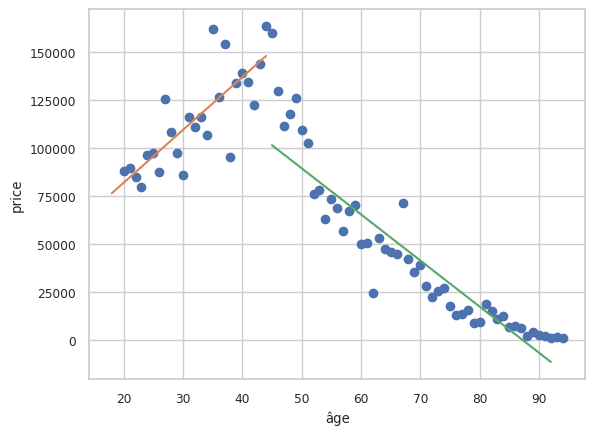

In [99]:
# Traçage de la droite de régression à partir des coefficients obtenus :

plt.plot(df_achat_age['age'] , df_achat_age['price'], 'o')
plt.plot(np.arange(18, 45), [a1*x+b1 for x in np.arange(18, 45)])
plt.plot(np.arange(45, 93), [a2*x+b2 for x in np.arange(45, 93)])
plt.xlabel('âge')
plt.ylabel('price')
plt.show()

***
[Pearson Coefficient of Correlation Explained](https://medium.com/towards-data-science/pearson-coefficient-of-correlation-explained-369991d93404)
***